In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Reading and displaying the dataset

In [ ]:
path = "./drive/MyDrive/Colab Notebooks/Security_Privacy_Project/"
df = pd.read_csv(path+'sqliv2.csv', encoding='utf-16') # Read the dataset.
df.head(10)

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
5,select * from users where id = '1' or @ @1 = ...,1
6,"select * from users where id = 1 or 1#"" ( un...",1
7,' select name from syscolumns where id = ( ...,1
8,select * from users where id = 1 +$+ or 1 = 1...,1
9,"1; ( load_file ( char ( 47,101,116,99,47,112,9...",1


### Removing unused columns

In [ ]:
del df['Unnamed: 2']

del df['Unnamed: 3']

In [ ]:
df.shape

(33761, 2)

In [ ]:
df.head()

,Sentence,Label
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
5,select * from users where id = '1' or @ @1 = ...,1


In [ ]:
print("----------------------------------------------------")
df.info()
print("----------------------------------------------------")

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33757 entries, 1 to 33760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  33757 non-null  object
 1   Label     33757 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 791.2+ KB
----------------------------------------------------


In [ ]:
df['Label'].describe()

count    33757.000000
mean         0.339278
std          0.473471
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Label, dtype: float64

#### Process NaN values

In [ ]:
df['Label'].isna().sum() # Count NaN label values.

0

In [ ]:
df = df.dropna() # Remove Nan values.

### Fixing the target label

In [ ]:
# Get unique values existing in the label column.

unique_label = pd.unique(df['Label'])

print('\n'.join(l for l in unique_label))

TypeError: ignored


#### Above, we can see that the label contains more than simply 0s and 1s. We need to fix the errors it includes.

In [ ]:
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index) # Dropping the label values, that are different from 0 or 1.

In [ ]:
df['Label'] = df['Label'].astype('int') # Convert the label type to integer.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 717.4+ KB


In [ ]:
df[df['Label'] == 1].count() # Count how much label are 1.

Sentence    11341
Label       11341
dtype: int64

In [ ]:
df[df['Label'] == 0].count() # Count how much label are 0.

Sentence    22304
Label       22304
dtype: int64

### Distribution of the label

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



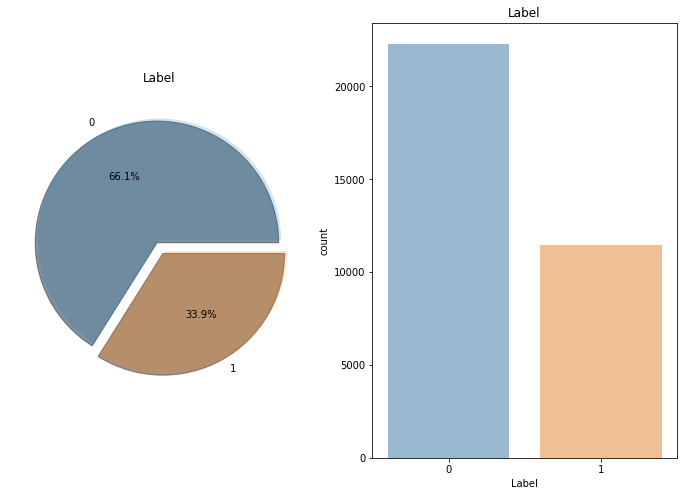

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot('Label',data=df,ax=ax[1], alpha=0.5)
ax[1].set_title('Label')
plt.show()

In [ ]:
df.head()

,Sentence,Label
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
5,select * from users where id = '1' or @ @1 = ...,1


### How many comments symbols are in the payloads ?

In [ ]:
comment_values = df[df.Sentence.str.contains('#|--|//')]

In [ ]:
comment_values.count()[0] # How many comments symbols are in the payloads.

5988

### The tables in the payloads

In [ ]:
from_values = df[df.Sentence.str.contains('from')]

In [ ]:
# Print the existing tables in the payload.
l = list(from_values.Sentence)

tables = []
for i in l:
    x = i[i.index('from')+5:].split(' ')
    if x[0] not in tables and len(x[0]) > 1:
        tables.append(x[0])
print(tables)

['users', 'syscolumns', 'wapiti', 'sysobjects', 'information_schema.tables--', 'temp', 'tabname', 'where', 'information_schema.tables;', 'tablenames', 'dog', 'tail-wagging', 'generate_series', 'information_schema.character_sets', 'dual', 'pg_sleep', 'all_users', 'sysibm.systables', 'rdb$database', 'sysusers', 'mysql.db', 'domain.domains', 'rdb$fields', 'master..sysdatabases', 'information_schema.system_users', 'dual--', 'dual#']


### Top used wods in payloads

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-40-97f186f72edf>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



All frequencies, including STOPWORDS:
        Frequency
Word             
)           45476
(           40286
,           16320
=           13771
select      10018
1           10000
'            9015
chr          6588
and          6071
as           5146


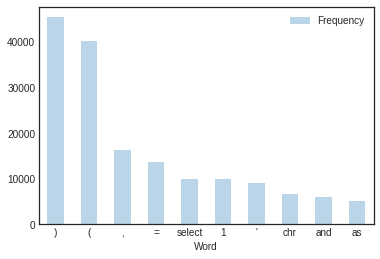

In [ ]:
import nltk
nltk.download('punkt')

top_N = 10


payloads = df.Sentence.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(payloads)
word_dist = nltk.FreqDist(words)


print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
print('=' * 60)

matplotlib.style.use('seaborn-white')

rslt.plot.bar(rot=0, alpha=0.3)

In [ ]:
df.shape

(33757, 2)

In [ ]:
df.to_csv(path+'processed.csv', index=False, encoding='utf-16')